In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


df = pd.read_csv('C:/Users/dhwon/Desktop/Bird folder/BostonHousing.csv', encoding= 'cp949')

df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [3]:
df.isnull().sum().sort_values(ascending=False).head(20)

rm         5
crim       0
zn         0
indus      0
chas       0
nox        0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
df = pd.get_dummies(df)

df = df.fillna(df.mean())

df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 3. 속성별 관련도 추출하기

In [5]:
df_corr=df.corr()

df_corr_sort=df_corr.sort_values('medv', ascending=False)

df_corr_sort['medv'].head(14)

medv       1.000000
rm         0.695375
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

C:\Users\dhwon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


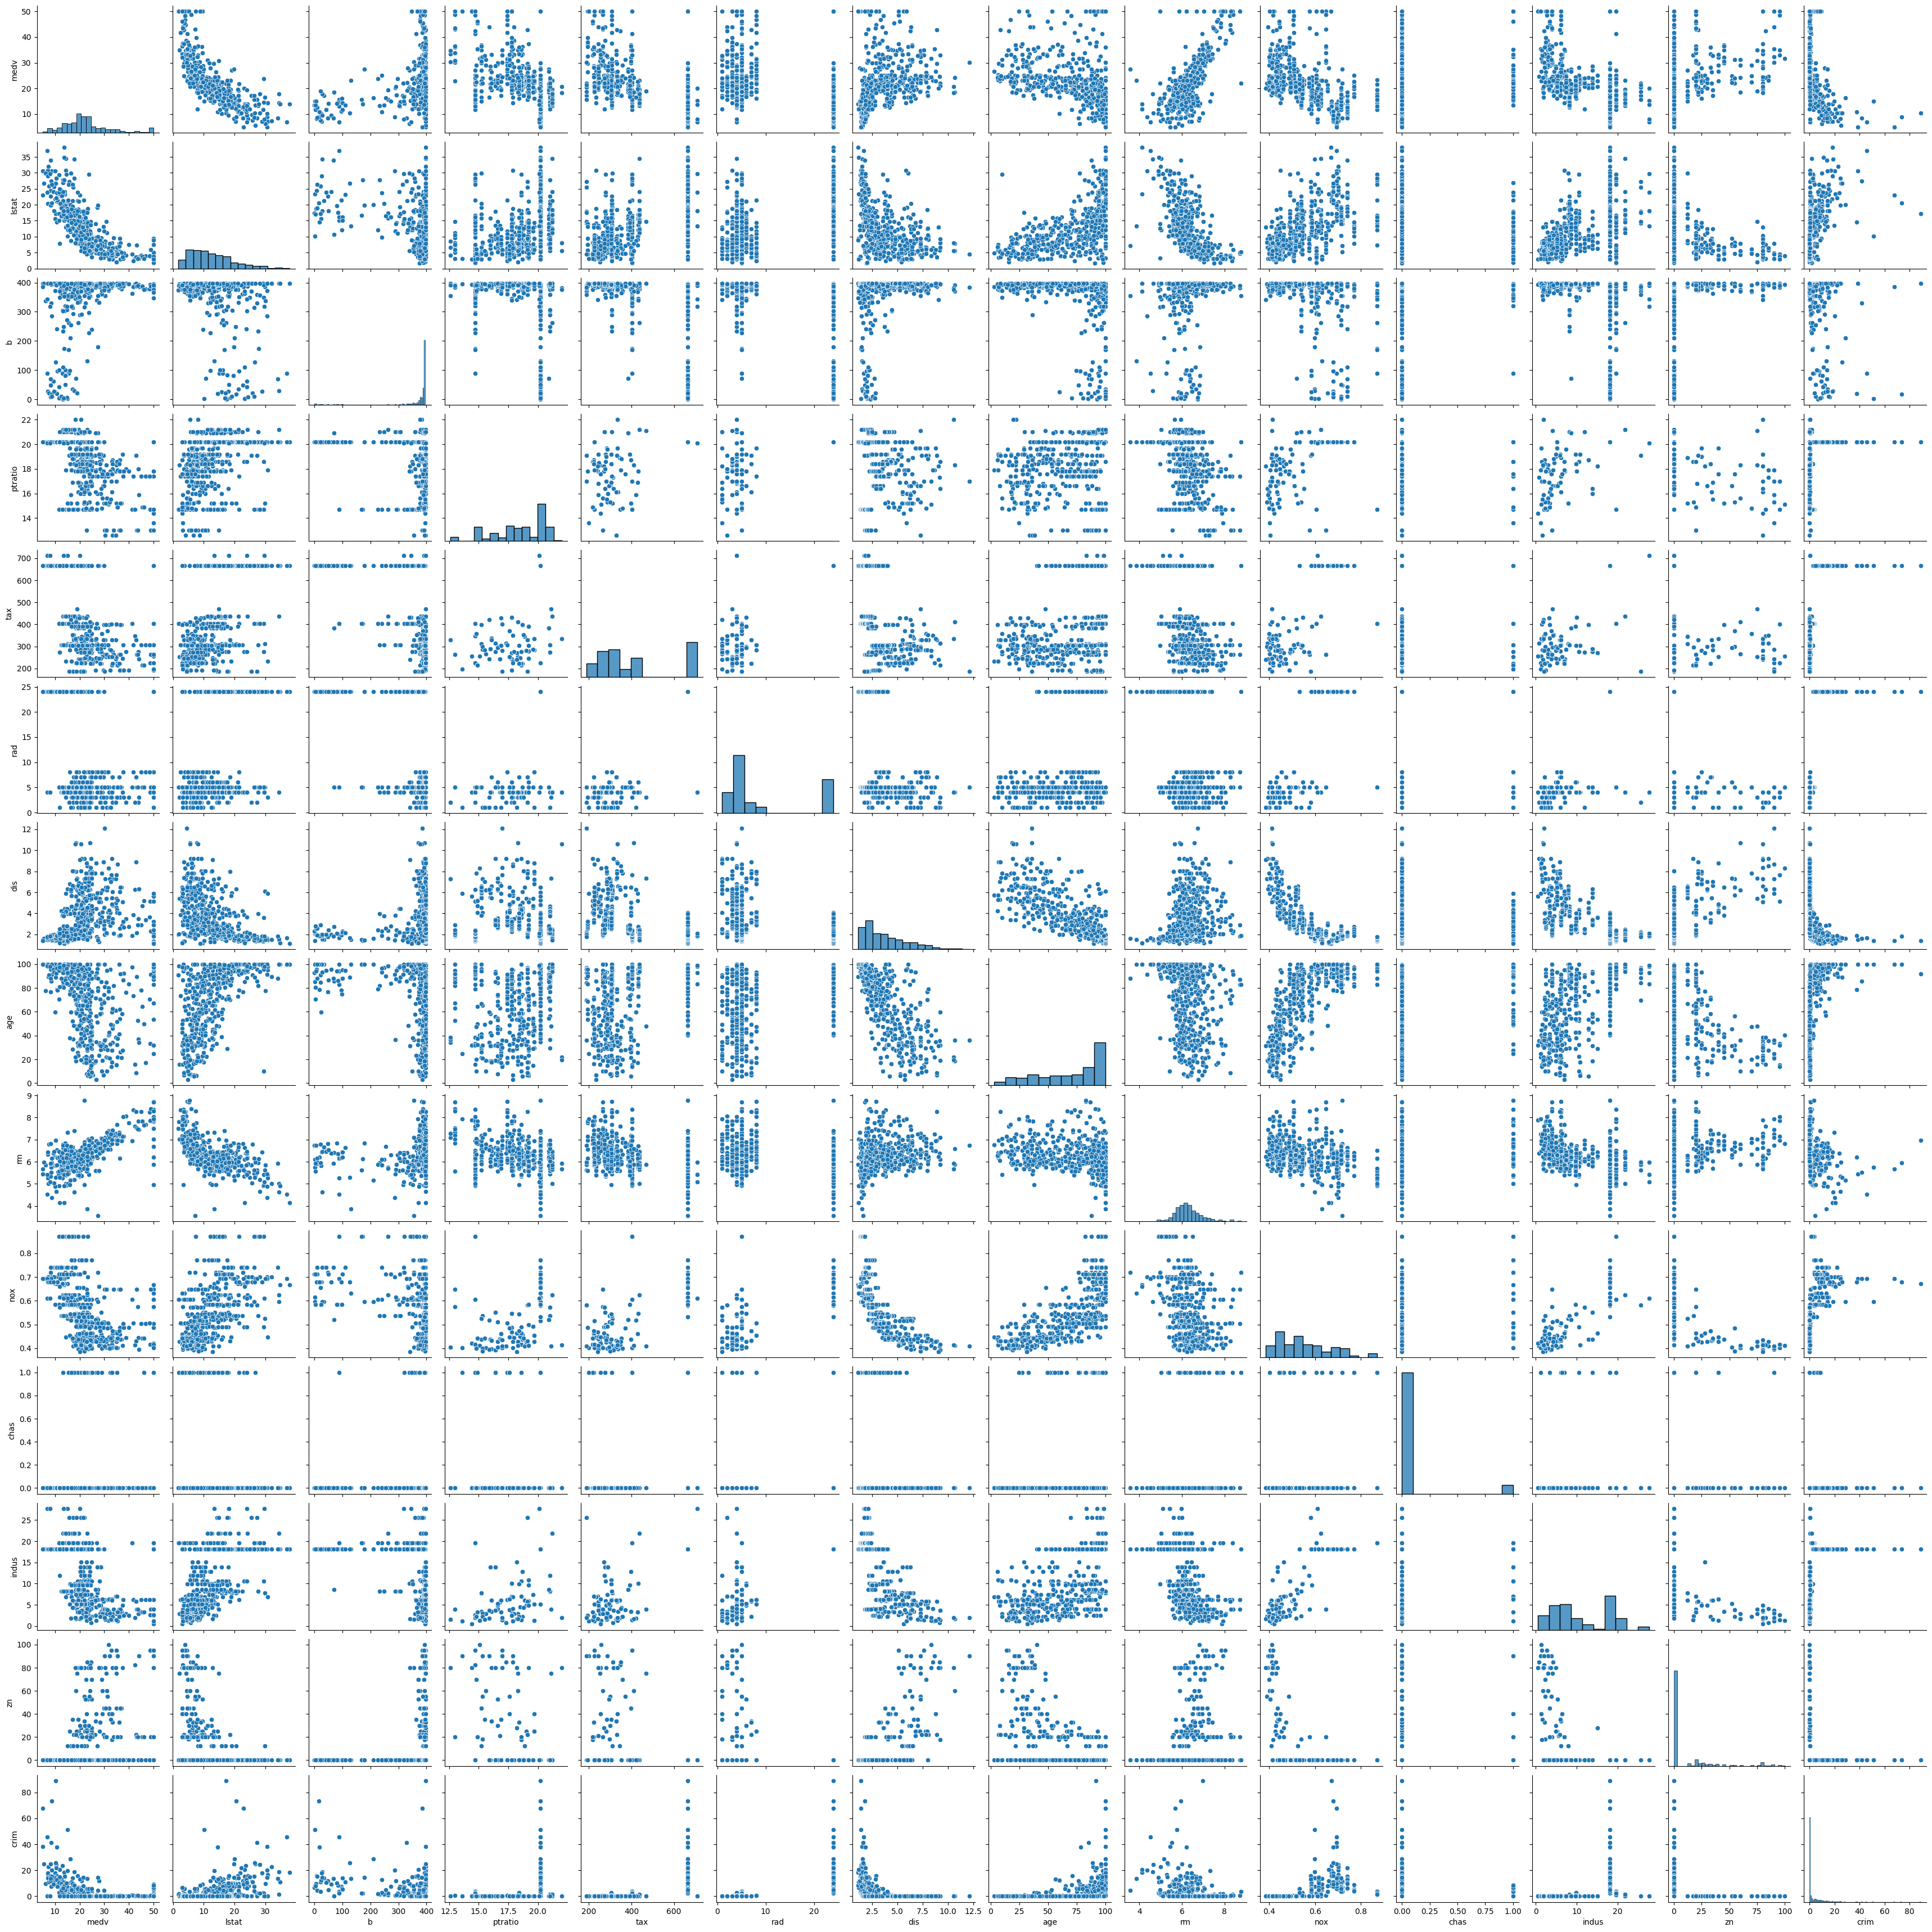

In [6]:
cols=['medv','lstat','b','ptratio','tax','rad','dis','age','rm','nox','chas','indus','zn','crim']
sns.pairplot(df[cols])
plt.show();

## 4. 주택 가격 예측 모델

In [7]:
cols_train=['medv','lstat','b','ptratio','tax','rad','dis','age','rm','nox','chas','indus','zn','crim']
X_train_pre = df[cols_train]

y = df['medv'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [9]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer ='adam', loss = 'mean_squared_error')

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="C:/Users/dhwon/Desktop/Bird folder/Sobusy.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1761 (6.88 KB)
Trainable params: 1761 (6.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
10/10 [==============================] - 1s 27ms/step - loss: 499.8828 - val_loss: 104.0544
Epoch 2/2000
10/10 [==============================]

C:\Users\dhwon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 0s 7ms/step - loss: 62.8622 - val_loss: 81.2635
Epoch 5/2000
10/10 [==============================] - 0s 7ms/step - loss: 52.1689 - val_loss: 68.7251
Epoch 6/2000
10/10 [==============================] - 0s 7ms/step - loss: 49.3975 - val_loss: 67.4131
Epoch 7/2000
10/10 [==============================] - 0s 7ms/step - loss: 46.2718 - val_loss: 67.0228
Epoch 8/2000
10/10 [==============================] - 0s 6ms/step - loss: 45.1796 - val_loss: 63.9909
Epoch 9/2000
10/10 [==============================] - 0s 7ms/step - loss: 43.5750 - val_loss: 63.1181
Epoch 10/2000
10/10 [==============================] - 0s 7ms/step - loss: 42.5086 - val_loss: 62.7079
Epoch 11/2000
10/10 [==============================] - 0s 6ms/step - loss: 41.3346 - val_loss: 62.1355
Epoch 12/2000
10/10 [==============================] - 0s 7ms/step - loss: 40.6091 - val_loss: 60.0784
Epoch 13/2000
10/10 [==============================] - 0s 7ms/step - loss: 39.6422 - val_los

In [10]:
real_prices =[]
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("Realprice: {:.2f}, Machinesays: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

4/4 [==============================] - 0s 1ms/step
Realprice: 19.40, Machinesays: 19.22
Realprice: 36.20, Machinesays: 35.08
Realprice: 19.40, Machinesays: 19.18
Realprice: 21.70, Machinesays: 21.53
Realprice: 14.00, Machinesays: 13.98
Realprice: 15.60, Machinesays: 15.37
Realprice: 19.30, Machinesays: 19.03
Realprice: 22.60, Machinesays: 21.92
Realprice: 17.80, Machinesays: 16.98
Realprice: 32.90, Machinesays: 33.66
Realprice: 13.40, Machinesays: 13.40
Realprice: 18.50, Machinesays: 19.02
Realprice: 14.40, Machinesays: 14.97
Realprice: 17.80, Machinesays: 17.37
Realprice: 15.00, Machinesays: 15.18
Realprice: 7.00, Machinesays: 6.29
Realprice: 34.90, Machinesays: 35.27
Realprice: 14.10, Machinesays: 13.30
Realprice: 42.30, Machinesays: 42.29
Realprice: 22.10, Machinesays: 21.86
Realprice: 21.10, Machinesays: 21.70
Realprice: 50.00, Machinesays: 49.22
Realprice: 44.80, Machinesays: 45.10
Realprice: 18.80, Machinesays: 18.51
Realprice: 19.60, Machinesays: 18.97


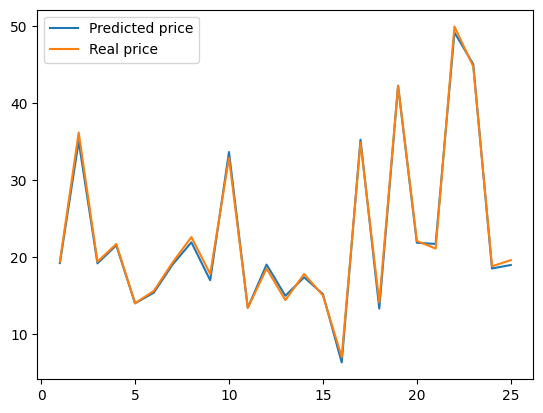

In [11]:

plt.plot(X_num, pred_prices, label='Predicted price')
plt.plot(X_num, real_prices, label='Real price')
plt.legend()
plt.show()